Aqui serão avaliadas as configurações de tamanho de janela que apresentaram menores erros. Cada feature foi estudada separadamente nos arquivos Feature_window-...

In [1]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.recurrent import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import aux_func as f


Using Theano backend.


In [3]:
feature_dim = 6
look_back = 0
data_file = 'abelha-original-formatado.csv'
data_use_percent = 1

# fix random seed for reproducibility
#numpy.random.seed(7)

# load the dataset
dataframe = pd.read_csv(data_file, engine='python')

In [4]:
dataframe.head(5)

,hora,temp,press,ventvel,rad,chuva,act
0,0,22.9,1010.1,0.0,-3.54,0.0,0.023
1,1,22.8,1009.5,0.0,-3.54,0.0,0.028
2,2,22.9,1009.6,0.0,-3.54,0.0,0.092
3,3,22.6,1009.6,0.0,-3.54,0.0,0.161
4,4,22.9,1009.9,0.0,33.98,0.0,0.276


In [5]:
dataframe = dataframe.drop(['hora','ventvel','chuva'],1)

In [6]:
dataframe = f.normalize(dataframe)

In [7]:
dataframe.head(5)

,temp,press,rad,act
0,0.026549,0.585714,0.000000,0.023
1,0.017699,0.500000,0.000000,0.028
2,0.026549,0.514286,0.000000,0.092
3,0.000000,0.514286,0.000000,0.161
4,0.026549,0.557143,0.011469,0.276


O menor erro para pressão foi com janelas até t-12

In [8]:
#create_window(data, feature_name, past_times =[])
window = [3,6,12]
dataframe_press = f.create_window(dataframe.copy(), "press", window)
feature_dim = len(window) + 1

In [9]:
dataframe_press

,press,press_t-3,press_t-6,press_t-12,act
12,0.328571,0.642857,0.757143,0.585714,1.175
13,0.271429,0.571429,0.757143,0.500000,0.691
14,0.271429,0.428571,0.700000,0.514286,0.581
15,0.342857,0.328571,0.642857,0.514286,0.456
16,0.442857,0.271429,0.571429,0.557143,0.548
17,0.514286,0.271429,0.428571,0.685714,0.382
18,0.642857,0.342857,0.328571,0.757143,0.060
19,0.714286,0.442857,0.271429,0.757143,0.009
20,0.757143,0.514286,0.271429,0.700000,0.046
21,0.742857,0.642857,0.342857,0.642857,0.005


In [10]:
#dataframe

In [11]:
window = [3,6,12]
dataframe_rad = f.create_window(dataframe.copy(), "rad", window)
dataframe_rad

,rad,rad_t-3,rad_t-6,rad_t-12,act
12,0.729180,0.892711,0.092110,0.000000,1.175
13,0.581848,0.990219,0.250873,0.000000,0.691
14,0.339149,0.955678,0.739878,0.000000,0.581
15,0.063132,0.729180,0.892711,0.000000,0.456
16,0.003629,0.581848,0.990219,0.011469,0.548
17,0.000000,0.339149,0.955678,0.048369,0.382
18,0.000000,0.063132,0.729180,0.092110,0.060
19,0.000058,0.003629,0.581848,0.250873,0.009
20,0.000012,0.000000,0.339149,0.739878,0.046
21,0.000006,0.000000,0.063132,0.892711,0.005


In [12]:
window = [3]
dataframe_temp = f.create_window(dataframe.copy(), "temp", window)
dataframe_temp

,temp,temp_t-3,act
3,0.000000,0.026549,0.161
4,0.026549,0.017699,0.276
5,0.168142,0.026549,0.618
6,0.362832,0.000000,1.060
7,0.495575,0.026549,1.240
8,0.601770,0.168142,1.217
9,0.681416,0.362832,1.346
10,0.743363,0.495575,1.207
11,0.831858,0.601770,1.166
12,0.805310,0.681416,1.175


In [13]:

dt = pd.concat([dataframe_press, dataframe_temp, dataframe_rad], axis=1, join='inner')
dt.head(5)

,press,press_t-3,press_t-6,press_t-12,act,temp,temp_t-3,act,rad,rad_t-3,rad_t-6,rad_t-12,act
12,0.328571,0.642857,0.757143,0.585714,1.175,0.805310,0.681416,1.175,0.729180,0.892711,0.092110,0.000000,1.175
13,0.271429,0.571429,0.757143,0.500000,0.691,0.796460,0.743363,0.691,0.581848,0.990219,0.250873,0.000000,0.691
14,0.271429,0.428571,0.700000,0.514286,0.581,0.734513,0.831858,0.581,0.339149,0.955678,0.739878,0.000000,0.581
15,0.342857,0.328571,0.642857,0.514286,0.456,0.619469,0.805310,0.456,0.063132,0.729180,0.892711,0.000000,0.456
16,0.442857,0.271429,0.571429,0.557143,0.548,0.495575,0.796460,0.548,0.003629,0.581848,0.990219,0.011469,0.548


In [14]:
dt['act1'] = 0
dt['act1'] = dt['act']
dt = dt.drop(['act'], axis=1)
dt = dt.rename(columns={'act1': 'act'})
dt.head(5)

,press,press_t-3,press_t-6,press_t-12,temp,temp_t-3,rad,rad_t-3,rad_t-6,rad_t-12,act
12,0.328571,0.642857,0.757143,0.585714,0.805310,0.681416,0.729180,0.892711,0.092110,0.000000,1.175
13,0.271429,0.571429,0.757143,0.500000,0.796460,0.743363,0.581848,0.990219,0.250873,0.000000,0.691
14,0.271429,0.428571,0.700000,0.514286,0.734513,0.831858,0.339149,0.955678,0.739878,0.000000,0.581
15,0.342857,0.328571,0.642857,0.514286,0.619469,0.805310,0.063132,0.729180,0.892711,0.000000,0.456
16,0.442857,0.271429,0.571429,0.557143,0.495575,0.796460,0.003629,0.581848,0.990219,0.011469,0.548


In [18]:
#dt

In [16]:
def train_predict(dataframe, times = 1):
    dataset2 = dataframe.values
    #resizing dataset len for faster tests 
    dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
    dataset2 = dataset2.astype('float32')

    # split into train and test sets
    train_size = int(len(dataset2) * 0.70)
    test_size = len(dataset2) - train_size
    train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]

    

    trainX, trainY = f.create_dataset(train, feature_dim, look_back)
    testX, testY = f.create_dataset(test, feature_dim, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


    for i in range(times):
        model = f.baseline_model(feature_dim + look_back)
        model.fit(trainX, trainY, nb_epoch=500, verbose=0)

        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
        print(str(i)+' Train Score: %.6f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY, testPredict))
        print(str(i)+' Test Score: %.6f RMSE' % (testScore))

    f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)

In [17]:
feature_dim = 10

0 Train Score: 0.155908 RMSE
0 Test Score: 0.253538 RMSE
1 Train Score: 0.154932 RMSE
1 Test Score: 0.245834 RMSE
2 Train Score: 0.160870 RMSE
2 Test Score: 0.241913 RMSE
3 Train Score: 0.167984 RMSE
3 Test Score: 0.251931 RMSE
4 Train Score: 0.171268 RMSE
4 Test Score: 0.247200 RMSE


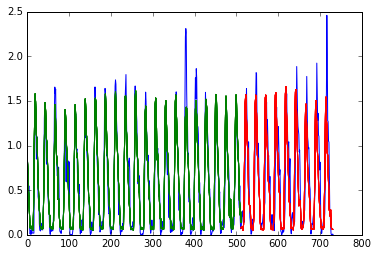

In [19]:
train_predict(dt,5)